Import pandas, seaborn and a new helper function. Note: **networkprocessing.py** must be in the same working directory as this Jupyter Notebook.

In [1]:
import pandas as pd
import seaborn as sns
import networkprocessing as np

To create a single network, pass a text file as the parameter of **np.make_network**. Make user you include the extension .txt

In [2]:
np.make_network("example.txt")

Processing example.txt


To create multiple networks, pass the name of the directory as the parameter.

In [106]:
np.make_network("avengers")

Processing avengers/phase3.txt
Processing avengers/phase2.txt
Processing avengers/phase1.txt


You can then read the result **nodeInfo.xlsx** file into a dataframe. This file is inside a newly created folder.

In [72]:
df = pd.read_excel("avengers_analysis/nodeInfo.xlsx",index_col=0)

You can inspect the first few lines, and generate some basic visualizations.

In [73]:
df.head()

,label,degree,weighted_degree,betweenness,normalized_betweenness,eccentricity,closeness,network
0,Anthony Russo,4,8,0.000000,0.000000,2,0.537037,phase3
1,Joe Russo,4,8,0.000000,0.000000,2,0.537037,phase3
2,Christopher Markus,4,8,0.000000,0.000000,2,0.537037,phase3
3,Stephen McFeely,4,8,0.000000,0.000000,2,0.537037,phase3
4,Kevin Feige,29,43,329.333333,0.811166,1,1.000000,phase3


<AxesSubplot:xlabel='network', ylabel='weighted_degree'>

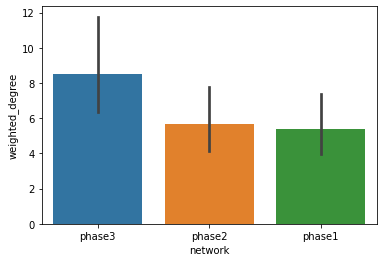

In [74]:
sns.barplot(data=df, x="network",y="weighted_degree")

<AxesSubplot:xlabel='network', ylabel='normalized_betweenness'>

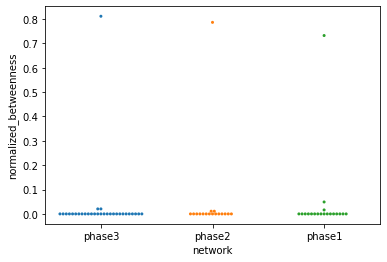

In [84]:
sns.swarmplot(data=df, x="network",y="normalized_betweenness",size=3)

In some cases, you might want to order the data to figure out what is going on.

In [107]:
df.sort_values(by="normalized_betweenness",ascending=False)

,Unnamed: 0,label,degree,weighted_degree,betweenness,normalized_betweenness,eccentricity,closeness,network
4,4,Kevin Feige,29,43,329.333333,0.811166,1,1.000000,phase3
32,32,Kevin Feige,16,20,94.333333,0.786111,1,1.000000,phase2
53,53,Kevin Feige,18,20,112.000000,0.732026,1,1.000000,phase1
52,52,Avi Arad,9,10,7.500000,0.049020,2,0.666667,phase1
13,13,Chris McKenna,12,18,8.333333,0.020525,2,0.630435,phase3
...,...,...,...,...,...,...,...,...,...
28,28,Ryan Fleck,5,10,0.000000,0.000000,2,0.527273,phase3
29,29,Geneva Robertson-Dworet,3,5,0.000000,0.000000,2,0.527273,phase3
30,30,Shane Black,4,6,0.000000,0.000000,2,0.533333,phase2
31,31,Drew Pearce,2,3,0.000000,0.000000,2,0.533333,phase2


### Selecting a portion of a dataframe

In some cases, you only want to see certain values. For example, only the node information for the "phase1" films (see the video for the full explanation).

In [108]:
phase1 = df["network"] == "phase1"

In [109]:
df.loc[phase1]

,label,degree,weighted_degree,betweenness,normalized_betweenness,eccentricity,closeness,network
47,Jon Favreau,7,8,2.5,0.016340,2,0.620690,phase1
48,Mark Fergus,6,6,0.0,0.000000,2,0.600000,phase1
49,Hawk Ostby,6,6,0.0,0.000000,2,0.600000,phase1
50,Art Marcum,6,6,0.0,0.000000,2,0.600000,phase1
51,Matt Holloway,6,6,0.0,0.000000,2,0.600000,phase1
52,Avi Arad,9,10,7.5,0.049020,2,0.666667,phase1
53,Kevin Feige,18,20,112.0,0.732026,1,1.000000,phase1
54,Louis Leterrier,4,4,0.0,0.000000,2,0.562500,phase1
55,Zak Penn,4,4,0.0,0.000000,2,0.562500,phase1
56,Gale Anne Hurd,4,4,0.0,0.000000,2,0.562500,phase1


You can use this to visualize that section of the dataframe on its own.

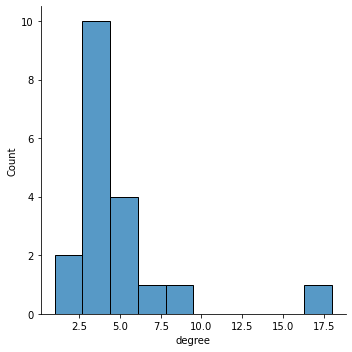

In [110]:
sns.displot(data=df.loc[phase1],x="degree")

### Pairplots

Pairplots let you compare many features in a grid. If many values are bunched together, you can set the "alpha" keyword to your desired level of transparency.

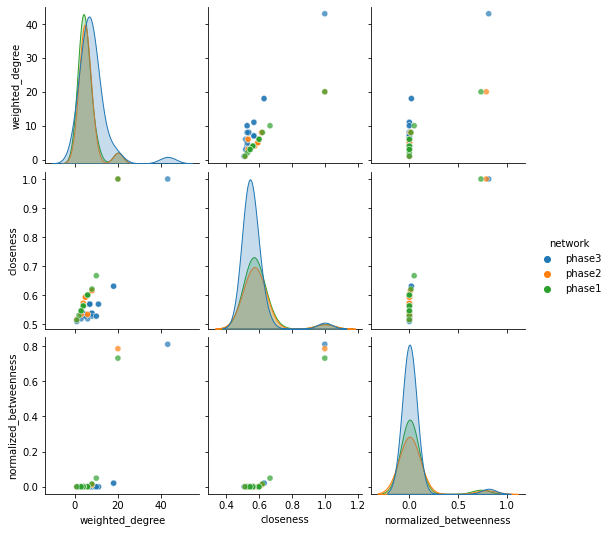

In [67]:
sns.pairplot(df,vars=["weighted_degree","closeness","normalized_betweenness"],
             hue="network",plot_kws={'alpha': 0.7})

In [105]:
df1.sort_values(by="weighted_degree",ascending=False)

,Unnamed: 0,label,degree,weighted_degree,betweenness,normalized_betweenness,eccentricity,closeness,network
4,4,Kevin Feige,29,43,329.333333,0.811166,1,1.000000,phase3
32,32,Kevin Feige,16,20,94.333333,0.786111,1,1.000000,phase2
53,53,Kevin Feige,18,20,112.000000,0.732026,1,1.000000,phase1
14,14,Erik Sommers,12,18,8.333333,0.020525,2,0.630435,phase3
13,13,Chris McKenna,12,18,8.333333,0.020525,2,0.630435,phase3
...,...,...,...,...,...,...,...,...,...
62,62,Joe Johnston,3,3,0.000000,0.000000,2,0.545455,phase1
57,57,Justin Theroux,2,2,0.000000,0.000000,2,0.529412,phase1
41,41,Joss Whedon,1,1,0.000000,0.000000,2,0.516129,phase2
8,8,James Gunn,1,1,0.000000,0.000000,2,0.508772,phase3
